# Image Processing - Humanities - Postal History

To provide some context for possible application of image processing techniques in (digital) humanities subject areas, this notebook uses subject matter relating to postal history.

For example, can we apply image processing techniques to enhance the view of covers we may wish to analyse.

Or can we train a classifier to identify different sorts of stamp?

## Image Processing - Extraction and Enhancement

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import urllib, cStringIO
%matplotlib inline

In [2]:
def getImgFromURL(url):
    f = cStringIO.StringIO(urllib.urlopen(url).read())
    image = Image.open(f)
    return image

def getImg(s):
    if s.startswith('http'):
        image=getImgFromURL(s)
    else:
        image = Image.open(s)
    plt.imshow(image)
    return image

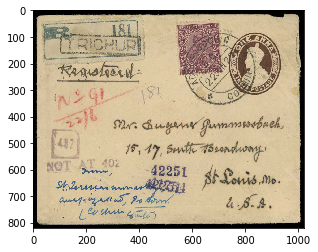

In [11]:
url="http://3.bp.blogspot.com/_6NwFMYOnaGg/TN9ZUnWjKGI/AAAAAAAAABc/569lxw9cDrY/s320/GB97.jpg"
#url='pennyRed.jpeg'
url='images/cover.png' #http://www.grosvenorauctions.com/dyn_pages/stamp_images/58/9158.jpg
image=getImg(url)

In [68]:
def getCancellation(image,R=130,G=130,B=130, nobright=False, preview=False):
    if preview:
        plt.imshow(image)
        plt.show()
    pix = image.load()
    xmax,ymax=image.size
    out = Image.new(image.mode, (xmax,ymax), None)
    opixel = out.load()
    for x in xrange(image.size[0]):
        #Really need to pass an acceptable window in?
        for y in xrange(image.size[1]):
            (a,b,c)=pix[x,y]
            if nobright and (a>R or b>G or c>B):
                opixel[x, y]=(255,255,255)
            if a<R and b<G and c<B:
                opixel[x, y]=(0,0,0)
            else:
                opixel[x, y]=(255,255,255)

    plt.imshow(out)
    return out

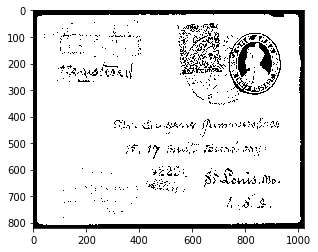

In [70]:
c=getCancellation(image,130,100,100)

In [50]:
def getCancellation2(image,H=10,S=90,L=90):
    pix = image.load()
    pix2=image.copy().convert('HSV').load()
    xmax,ymax=image.size
    out = Image.new(image.mode, (xmax,ymax), None)
    opixel = out.load()
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (a,b,c)=pix2[x,y]
            if a<=H and b<=S and c<=L:
                opixel[x, y]=(0,0,0)
            else:
                opixel[x, y]=(255,255,255)

    #plt.imshow(out)
    return out

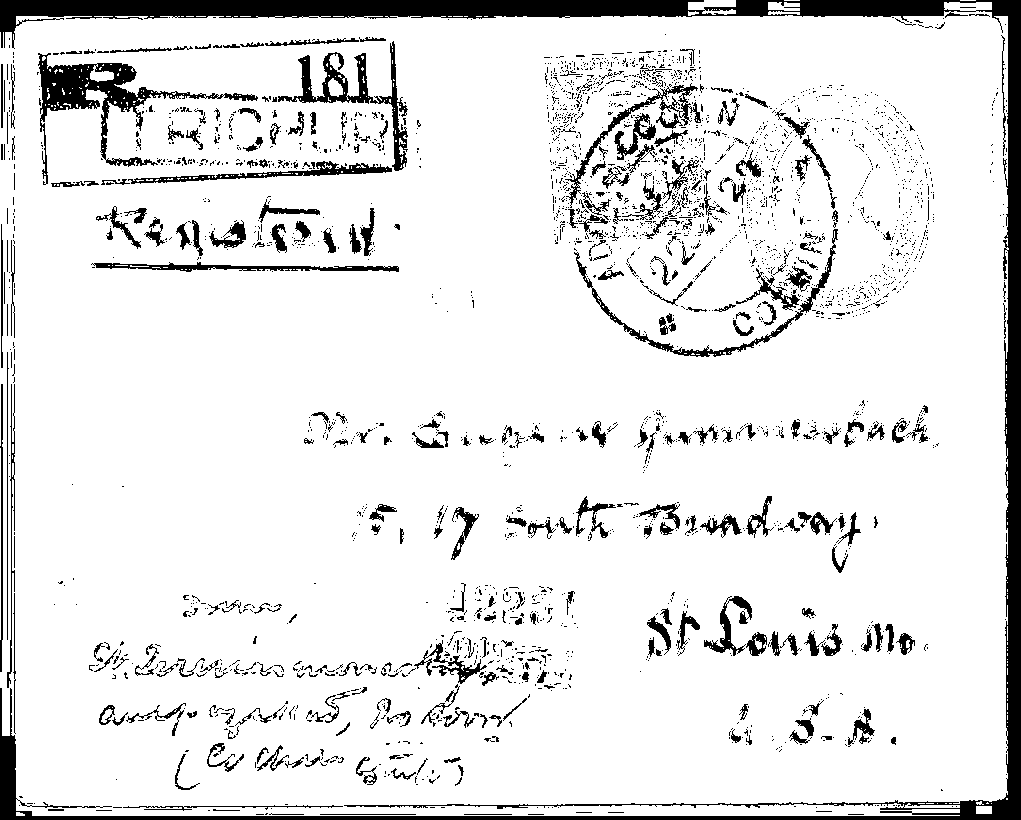

In [51]:
getCancellation2(image,180,95,145)

In [12]:
def getCancellationIsh(image,R=130,G=130,B=130,ish=10,flip=False,filterOut=False, preview=True):
    if preview:
        plt.imshow(image)
        plt.show()
        
    pix = image.load()
    xmax,ymax=image.size
    out = Image.new(image.mode, (xmax,ymax), None)
    opixel = out.load()
    
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (r,g,b)=pix[x,y]
            if r<R+ish and r>R-ish and g<G+ish and g>G-ish and b<B+ish and b>B-ish:
                if flip: opixel[x, y]=(255,255,255)
                else: opixel[x, y]=(0,0,0)
            else:
                if flip: opixel[x, y]=(0,0,0)
                else:opixel[x, y]=(255,255,255)

    plt.imshow(out)
    return out

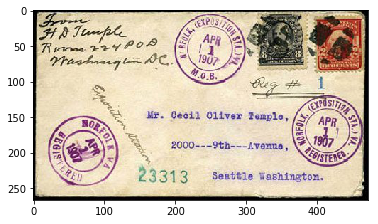

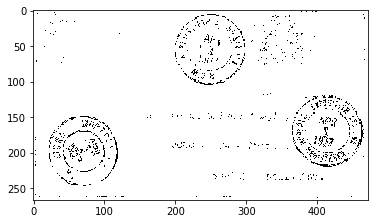

In [27]:
url="http://www.usphila.com/stamps/us/306/price-of-us-stamps-scott-306-1902-8-cents-martha-washington-harmerschau-96-539.jpg" 

tmp = getCancellationIsh(getImgFromURL(url),126,76,109, ish=30)

### def removeColour(image,R=130,G=130,B=130,ish=10,flip=False):
    pix = image.load()
    xmax,ymax=image.size
    out = Image.new(image.mode, (xmax,ymax), None)
    opixel = out.load()
    
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (r,g,b)=pix[x,y]
            if r<R+ish and r>R-ish and g<G+ish and g>G-ish and b<B+ish and b>B-ish:
                if flip: opixel[x, y]=(r,g,b)
                else: opixel[x, y]=(255,255,255)
            else:
                if flip: opixel[x, y]=(255,255,255)
                else:opixel[x, y]=(0,0,0)#(r,g,b)

    #plt.imshow(out)
    return out

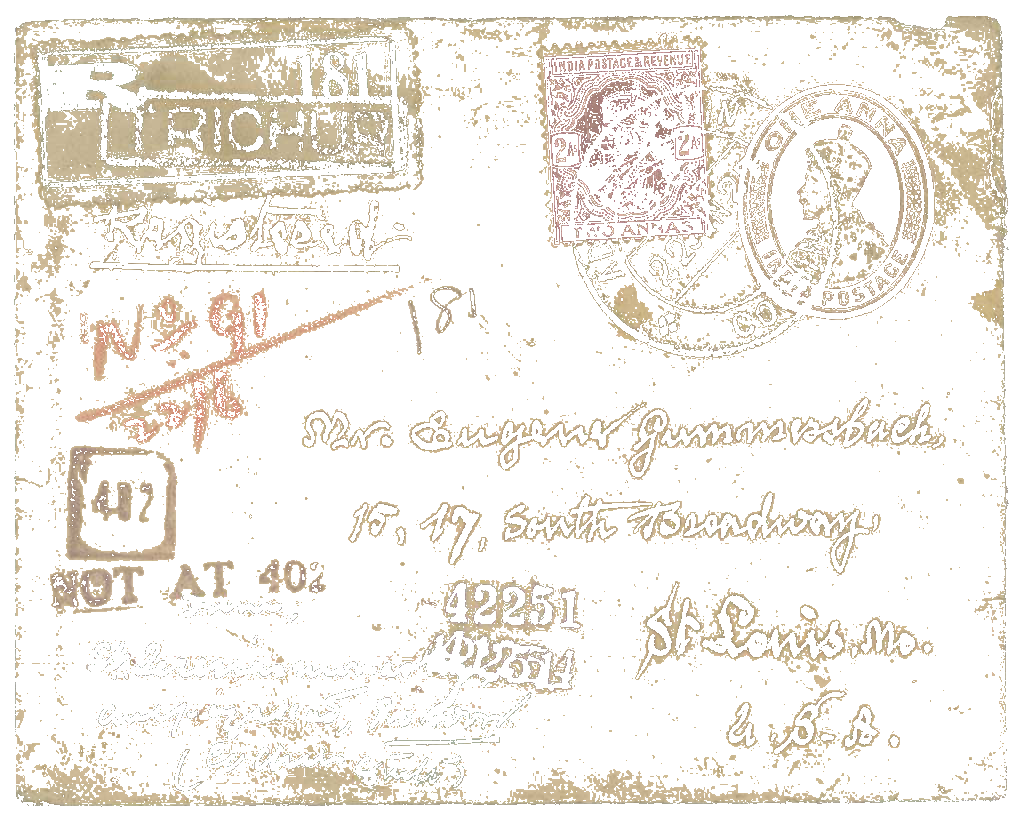

In [20]:
removeColour(image,194,154,150,35,True)

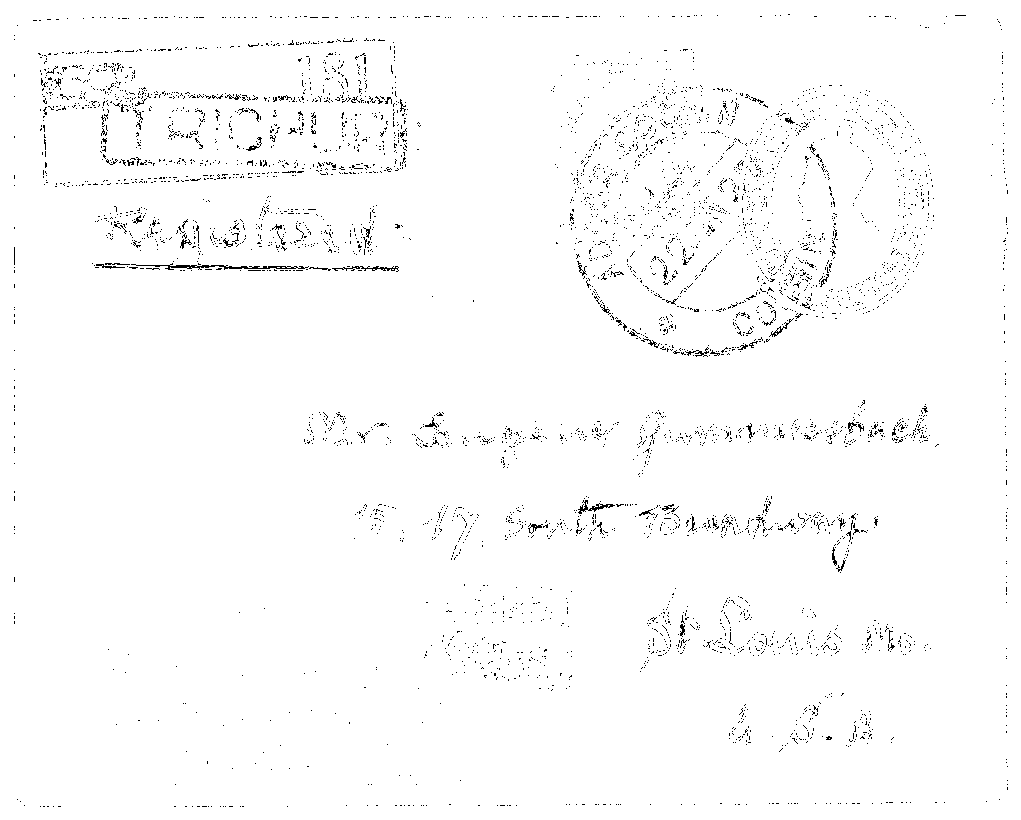

In [21]:
getCancellationIsh(image,120,110,90,15)

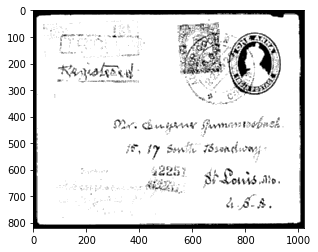

In [22]:
from PIL import ImageFilter
plt.imshow(c.filter(ImageFilter.BLUR));

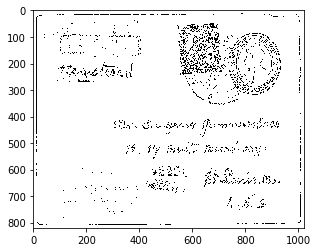

In [23]:
plt.imshow(c.filter(ImageFilter.CONTOUR));

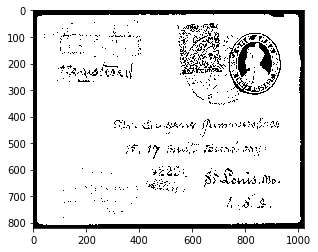

In [24]:
plt.imshow(c.filter(ImageFilter.DETAIL));

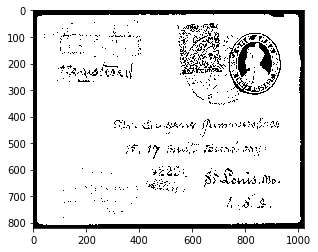

In [25]:
plt.imshow(c.filter(ImageFilter.EDGE_ENHANCE));

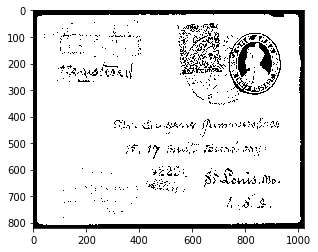

In [26]:
plt.imshow(c.filter(ImageFilter.EDGE_ENHANCE_MORE));

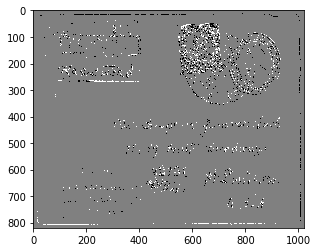

In [27]:
plt.imshow(c.filter(ImageFilter.EMBOSS));

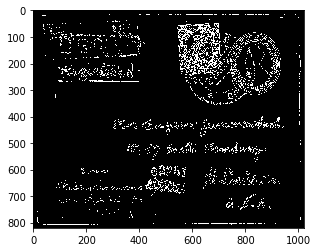

In [28]:
plt.imshow(c.filter(ImageFilter.FIND_EDGES));

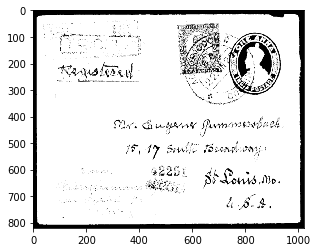

In [29]:
plt.imshow(c.filter(ImageFilter.SMOOTH));

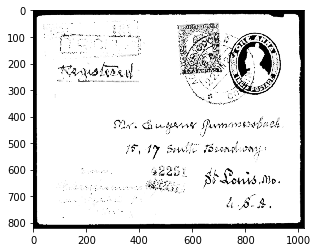

In [30]:
plt.imshow(c.filter(ImageFilter.SMOOTH_MORE));

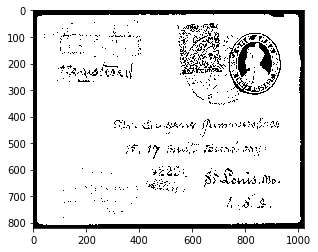

In [31]:
plt.imshow(c.filter(ImageFilter.SHARPEN));

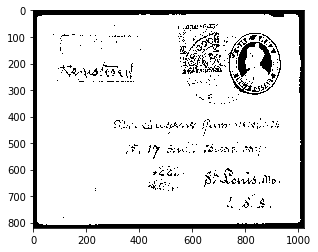

In [32]:
plt.imshow(c.filter(ImageFilter.MedianFilter(size=3)));

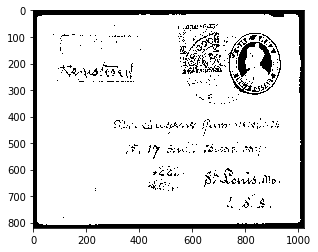

In [33]:
plt.imshow(c.filter(ImageFilter.ModeFilter(size=3)));

In [34]:
def makeMask(image):
    pix = image.load()
    xmax,ymax=image.size
    mask = Image.new(image.mode, (xmax,ymax), None)
    mask.convert('RGBA')
    opixel = mask.load()
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (a,b,c)=pix[x,y]
            if a<130 and b<130 and c<130:
                opixel[x, y]=(0,0,0,0)
            else:
                opixel[x, y]=(255,255,255,255)

    #plt.imshow(mask)
    return mask

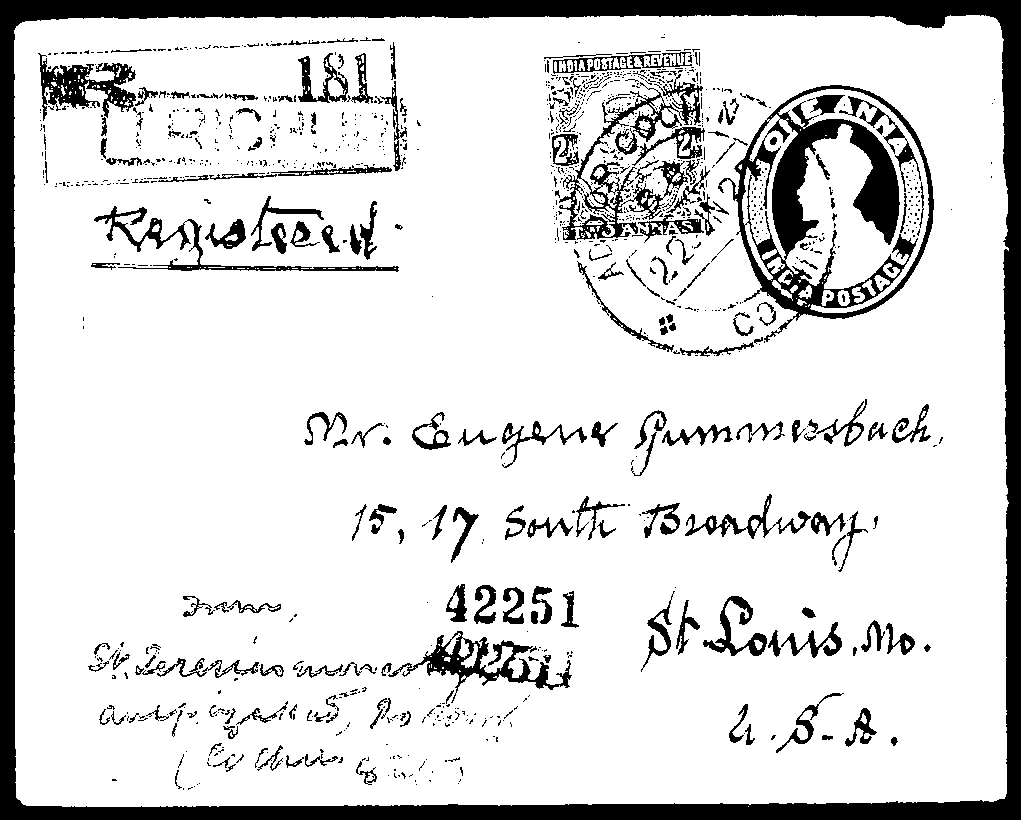

In [36]:
mask=makeMask(image)
mask

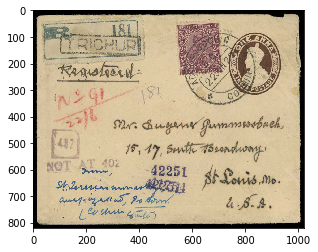

In [37]:
plt.imshow(image);

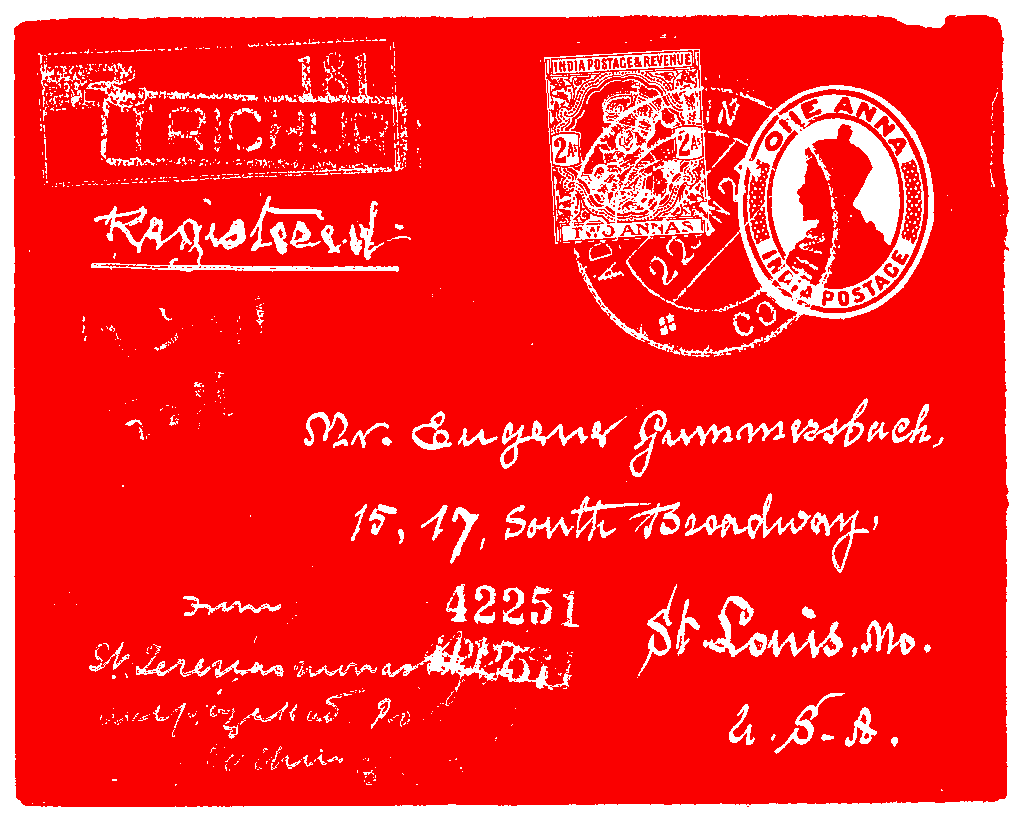

In [38]:
def highlight(image,R=90,G=80,B=90):
    pix = image.load()
    xmax,ymax=image.size
    ma = Image.new(image.mode, (xmax,ymax), None)
    opixel = ma.load()
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (a,b,c)=pix[x,y]
            if a>R and b>G and c>B:
                opixel[x, y]=(250,0,0)
            else:
                opixel[x, y]=(255,255,255)#pix[x,y]#(255,255,255)

    #plt.imshow(ma)
    return ma

highlight(image,10,100,100)

In [39]:
def blankCancellation(image):
    pix = image.load()
    xmax,ymax=image.size
    ma = Image.new(image.mode, (xmax,ymax), None)
    opixel = ma.load()
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (a,b,c)=pix[x,y]
            if a<130 and b<130 and c<130:
                opixel[x, y]=(230,220,180)
            else:
                opixel[x, y]=pix[x,y]#(255,255,255)

    #plt.imshow(ma)
    return ma

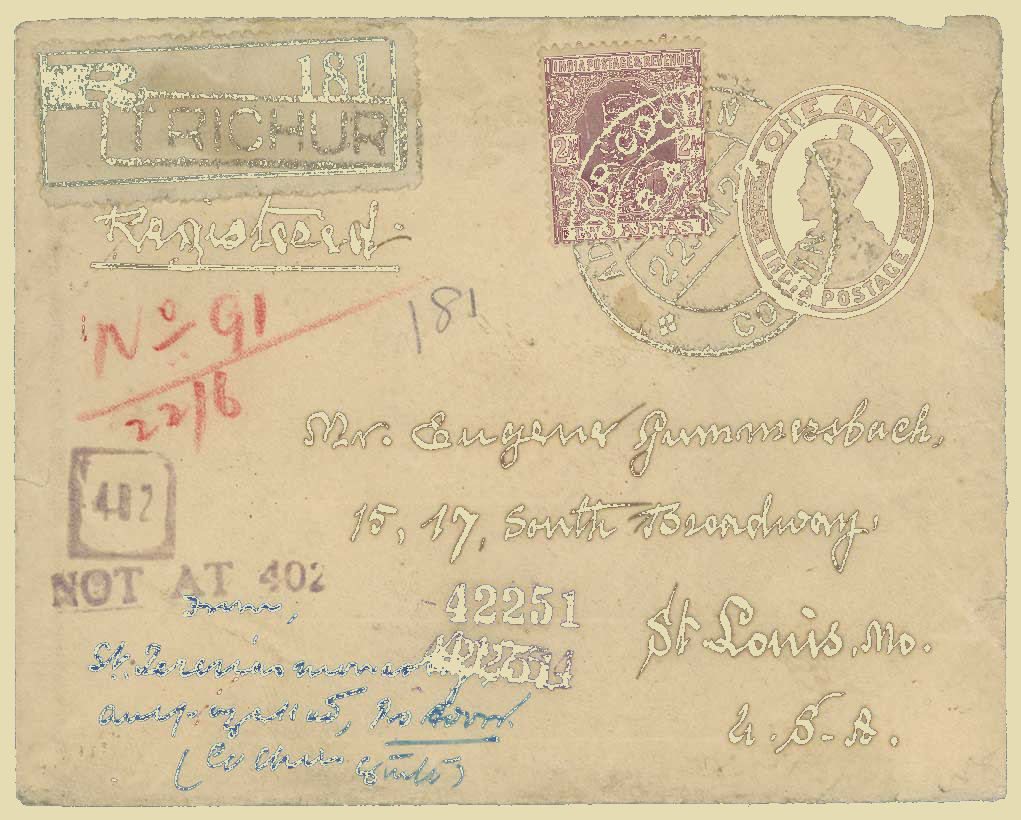

In [40]:
blankCancellation(image)

In [41]:
#Generate list of pixels to fill in from mask
def getPixels(ma):
    pixels=[]
    for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (a,b,c)=pix[x,y]
            if a<130 and b<130 and c<130:
                pixels.append([x,y])
    return pixels
#Find valid neighboring pixels: in the image and a non-background colour (so choose a clashy background colour)
def inBounds(x,y):
    if x>0 and y>0 and x<image.size[0] and y <image.size[1]: return True
    return False
def getValidNeighbours(px,im):
    neighbours=[]
    #valid in in image bounds and non-background
    for x in [-1,0,1]:
        for y in [-1,0,1]:
            if not (x==0 and y==0) and inBounds(px[0]+x, px[1]+y) and im[px[0],px[1]][0]!=0:
                neighbours.append([px[0]+x, px[1]+y])
    return neighbours
#Pick one from list of longest neighbours and fill in
#Repeat

#v slow, a pixel at a time

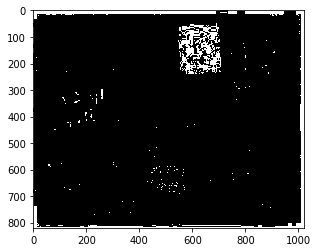

In [42]:
image2=image.copy()
xx=image2.load()
yy=image2.convert('HSV').load()
for x in xrange(image.size[0]):
    for y in xrange(image.size[1]):
        (a,b,c)=yy[x,y]
        if a<9:
            xx[x, y]=(255,255,255)
        else:
            xx[x, y]=(0, 0, 0)#(255,255,255)

plt.imshow(image2)

In [43]:
plt.plot(gap.histogram())

NameError: name 'gap' is not defined

In [ ]:
?xrange

In [44]:
c.save('testcancel.png')
gap.save('testgap.png')
image.save('testraw.png')
mask.save('testmask.png')

AttributeError: 'int' object has no attribute 'save'

In [ ]:
#https://github.com/dboze/innpaint
import os, sys
from PIL import Image
from collections import Counter
from random import shuffle

filename ='testcancel.png'# sys.argv[1]
image = Image.open(filename)
im = image.load()

filename = 'testmask.png'#sys.argv[2]
mask = Image.open(filename)
ma = mask.load()

#if (image.size != mask.size):
#    print "ERROR: Input image and mask have different dimensions!"
#    sys.exit(0)

width, height = image.size

tmask = mask.copy()
tma = tmask.load()

def is_valid(c, max):
    "Ensure that pixel coordinate is not out of range of the image"
    if (c >= 0 and c < max):
        return True
    else:
        return False

def neighbor_pixels(x, y, img):
    "Find all valid neighboring pixels"
    neighbors = []
    if (is_valid(y+1, height) and img[x, y+1][0] == 0):
        neighbors.append([x, y+1])
    if (is_valid(y-1, height) and img[x, y-1][0] == 0):
        neighbors.append([x, y-1])
    if (is_valid(x+1,width) and img[x+1, y][0] == 0):
        neighbors.append([x+1, y])
    if (is_valid(x-1,width) and img[x-1, y][0] == 0):
        neighbors.append([x-1, y])
    return neighbors

def extract_alpha(img):
    "Create a list of pixels [[x,y],...] for a given image where pixels are not null"
    alpha = []
    y = 0
    while y < height:
        x = 0
        while x < width:
            if (img[x,y][0] == 0):
                alpha.append([x,y])
            x = x + 1
        y = y + 1
    shuffle (alpha)
    return alpha
    
def average_rgb(pixels, img):
    "For a given list of pixels [[x,y],...], return the average color as RGB tuple"
    r, g, b = 0, 0, 0
    for p in pixels:
        c = img[p[0], p[1]]
        #print(c)
        r += c[0]
        g += c[1]
        b += c[2]
    length = len(pixels)
    if length > 0:
        return (int(r/length), int(g/length), int(b/length))
    else:
        return (0, 0, 0)

alpha = extract_alpha(ma)
x=1
if len(alpha)!=0:
    print('interp',len(alpha))
    while len(alpha) >0:
        #print(len(alpha))
        for p in alpha:
            neighbors = neighbor_pixels(p[0], p[1], ma)
            if len(neighbors) > 0:
                #print(neighbors,average_rgb(neighbors, im))
                im[p[0], p[1]] = average_rgb(neighbors, im)
                tma[p[0], p[1]] = (1,1,1)
        ma = tma
        alpha = extract_alpha(ma)
else: print('no interp')

newfile = 'testfill.jpg'#sys.argv[3]
image.save(newfile)
plt.imshow(image)

In [ ]:
im[99,0]

In [ ]:
pix=ma
p=0
q=0
r=0

for x in xrange(image.size[0]):
        for y in xrange(image.size[1]):
            (a,b,c,d)=pix[x,y]
            if a==255:
                p=p+1
            elif a==0:
                q=q+1
            else: r=r+1
print(p,q,r)

In [ ]:
image.size

In [ ]:
127*134

## Classification

Can we train a classifier to identify different sorts of stamp?